In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange, vectorize

In [2]:
D = 0.1744
beta = 1.02764
x_e = 1.40201

In [3]:
def Morse_potential(x):
    return D*( 1 - np.exp( -beta*(x - x_e) ) )**2

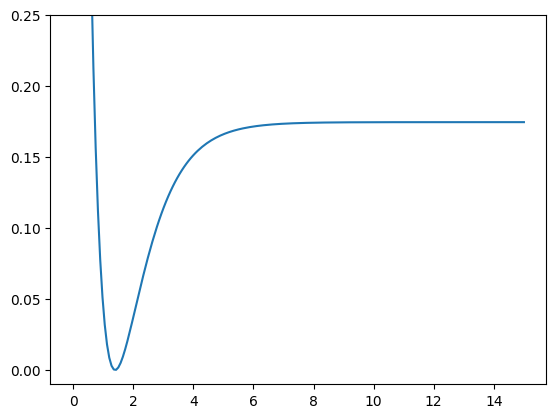

In [4]:
plt.plot( np.linspace(0, 15, 200), [ Morse_potential(x) for x in np.linspace(0, 15, 200) ] )
plt.ylim(-0.01, 0.25)
plt.show()

In [5]:
E_16 = 0.17391611
E_15 = 0.17228638

x_out = x_e - (1/beta)*np.log( 1 - np.sqrt(E_15/D) )

print(x_out)

6.367808203828468


In [6]:
N = 257
L = 1.5*x_out
delta_x = L/(N-1)
print(delta_x)

x_grid = np.linspace(0, L, N)
print(x_grid)
print( (N-1)*delta_x)

#so, 0 <= i < N

0.03731137619430743
[0.         0.03731138 0.07462275 0.11193413 0.1492455  0.18655688
 0.22386826 0.26117963 0.29849101 0.33580239 0.37311376 0.41042514
 0.44773651 0.48504789 0.52235927 0.55967064 0.59698202 0.6342934
 0.67160477 0.70891615 0.74622752 0.7835389  0.82085028 0.85816165
 0.89547303 0.9327844  0.97009578 1.00740716 1.04471853 1.08202991
 1.11934129 1.15665266 1.19396404 1.23127541 1.26858679 1.30589817
 1.34320954 1.38052092 1.4178323  1.45514367 1.49245505 1.52976642
 1.5670778  1.60438918 1.64170055 1.67901193 1.7163233  1.75363468
 1.79094606 1.82825743 1.86556881 1.90288019 1.94019156 1.97750294
 2.01481431 2.05212569 2.08943707 2.12674844 2.16405982 2.2013712
 2.23868257 2.27599395 2.31330532 2.3506167  2.38792808 2.42523945
 2.46255083 2.49986221 2.53717358 2.57448496 2.61179633 2.64910771
 2.68641909 2.72373046 2.76104184 2.79835321 2.83566459 2.87297597
 2.91028734 2.94759872 2.9849101  3.02222147 3.05953285 3.09684422
 3.1341556  3.17146698 3.20877835 3.24608973

In [7]:
delta_k = 2*np.pi/L
n = int((N-1)/2)

print(delta_k, n)


0.6578072188587585 128


In [8]:
mu = 917.704934466496
mu = 918.49

def Tl(l):
    return (2/mu)*(np.pi*l/L)**2

[0.00986923 0.02874537 0.04647174 0.06304836 0.07847522 0.09275231
 0.10587964 0.11785722 0.12868503 0.13836308 0.14689137 0.15426989
 0.16049866 0.16557767 0.16885706 0.16950691 0.17228641 0.17393041
 0.174894   0.1760964  0.1776234  0.17941924 0.1814539  0.18370776
 0.18616669 0.1888199  0.19165881 0.19467636 0.19786667 0.20122469
 0.20474607 0.20842701 0.21226413 0.21625442 0.22039518 0.22468396
 0.22911854 0.23369689 0.23841711 0.2432775  0.24827643 0.25341241
 0.25868405 0.26409004 0.26962913 0.27530016 0.28110204 0.2870337
 0.29309416 0.29928246 0.30559768 0.31203894 0.31860541 0.32529626
 0.33211071 0.33904799 0.34610736 0.35328808 0.36058945 0.36801077
 0.37555136 0.38321053 0.39098764 0.39888201 0.40689302 0.41501998
 0.42326228 0.43161926 0.44009032 0.44867477 0.45737204 0.46618143
 0.47510241 0.48413423 0.49327646 0.50252828 0.51188935 0.52135882
 0.5309365  0.54062145 0.55041372 0.56031224 0.57031744 0.58042804
 0.59064497 0.60096667 0.61139473 0.62192717 0.63256646 0.64330

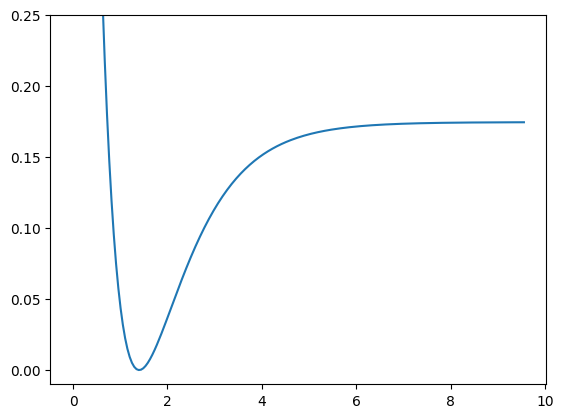

In [9]:
H = np.empty( (N, N) )

for i in range(N):
    for j in range(N):
        l_sum = 0
        for l in range(0, n):
            l_sum += np.cos( l*(2*np.pi)*(i - j)/(N-1) )*Tl(l)
        #print(l_sum)
        H[i, j] = (2/(N-1))*l_sum + Morse_potential(x_grid[i])*(i == j)
        #print( str( round(H[i, j], 3) ) + " ", end='')
    #print("\n")

eig_energies, eig_states = np.linalg.eig(H)

sort_indexes = np.argsort(eig_energies)

eig_energies = eig_energies[sort_indexes]
eig_states = eig_states[:, sort_indexes]

plt.plot( np.linspace(0, L, 200), [ Morse_potential(x) for x in np.linspace(0, L, 200) ] )
plt.ylim(-0.01, 0.25)

print(eig_energies)


In [10]:
state = eig_states[:, 16]
#print(state_0)

renormalised_state = state/np.sqrt(delta_x)
sqrmod = np.sum(renormalised_state**2)
print(sqrmod*delta_x)
print(delta_x)

1.0000000000000002
0.03731137619430743


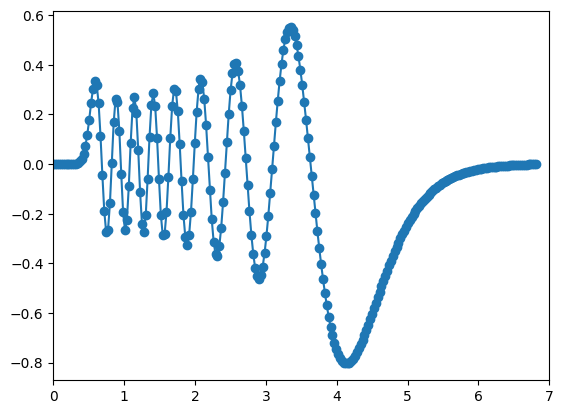

In [11]:
plt_state = renormalised_state
plt.scatter( x_grid/x_e, plt_state )
plt.plot( x_grid/x_e, plt_state )
plt.xlim(0, 7)
plt.show()

In [12]:
print( ((17.41*beta)**2)/(2*D) )

917.704934466496


In [13]:
@njit
def V_MsC(alpha: float, r: float) -> float:

    """Calculates the 1D Morse-Coulomb potencial given the position r"""
    

    D = 1/alpha ; beta = 1/(alpha*np.sqrt(2))

    if r > 0:
        pot = -1/np.sqrt(r*r + alpha*alpha)
    else:
        pot = D*( np.exp( -2*beta*r) -2*np.exp( -beta*r ) )
    return pot

@njit
def MsC_return_points(alpha: float, E: float):

    """Calculates the return points of a particle based on alpha and the total Energy"""
    
    rm = -alpha*np.sqrt(2)*np.log( np.sqrt( alpha*E + 1 ) + 1 )
    rM = np.sqrt( 1/(E**2) - alpha**2 )
    
    return np.array([rm, rM])

@njit(parallel=True)
def MsC_eigenstates(alpha, E_max, N):
    

    #set up the grid
    rm, rM = MsC_return_points(alpha, E_max)
    #print(endpoints)
    endpoints = [1.5*rm, 1.5*rM]

    L = endpoints[1] - endpoints[0]
    delta_r = L/(N-1)
    #print(delta_r)

    r_grid = np.linspace(endpoints[0], endpoints[1], N)

    delta_k = 2*np.pi/L
    n = int((N-1)/2)

    def T_l(l, L):
        return 2*(np.pi*l/L)**2

    H = np.empty( (N, N) )

    for i in prange(N):
        for j in prange(N):
            l_sum = 0
            for l in prange(0, n):
                l_sum += np.cos( l*(2*np.pi)*(i - j)/(N-1) )*T_l(l, L)
            #print(l_sum)
            H[i, j] = (2/(N-1))*l_sum + V_MsC(alpha, r_grid[i])*(i == j)
            #print( str( round(H[i, j], 3) ) + " ", end='')
        #print("\n")

    # Find the eigenvalues and eigenvectors
    eig_energies, eig_states = np.linalg.eig(H)

    # Sort eigenvalues and corresponding eigenvectors
    sort_indexes = np.argsort(eig_energies)
    eig_energies = eig_energies[sort_indexes]
    eig_states = eig_states[:, sort_indexes]/np.sqrt(delta_r)

    #print(eig_energies)
    # Filter eigenvalues less than or equal to E_max and corresponding eigenvectors
    mask = eig_energies <= E_max
    eig_energies = eig_energies[mask]
    eig_states = eig_states[:, mask]

    return eig_energies, eig_states, r_grid

In [15]:
alpha = 1
E_max = -0.01
N = 129

MsC_energies, MsC_states = MsC_eigenstates(alpha, E_max, N)

for E in MsC_energies:
  print(E)

ValueError: too many values to unpack (expected 2)

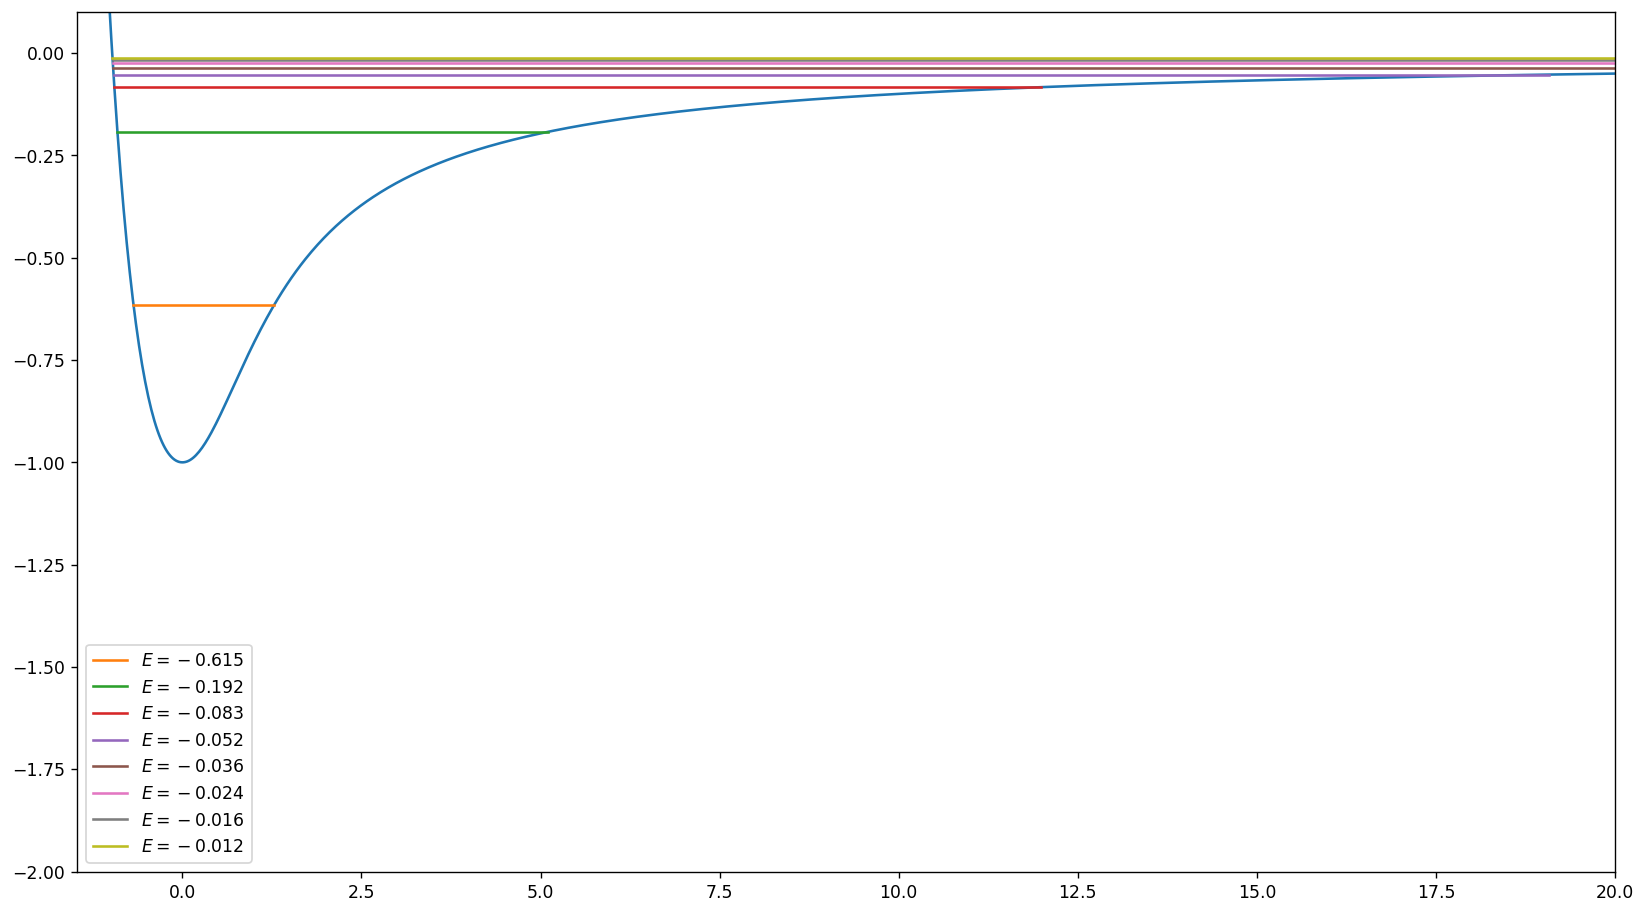

In [15]:
rm, rM = 1.5*MsC_return_points(alpha, E_max)
plt.figure(figsize=(16, 9),dpi=124)
plt.plot( np.linspace(rm, 20, 1000), [ V_MsC(alpha, x) for x in np.linspace(rm, 20, 1000) ] )
plt.ylim(-2, 0.1)
plt.xlim(rm, 20)
for E in MsC_energies:
  plt.plot( MsC_return_points(alpha, E), np.array([E, E]), label="$E = {:.3f}$".format(E) )
plt.legend()
plt.show()

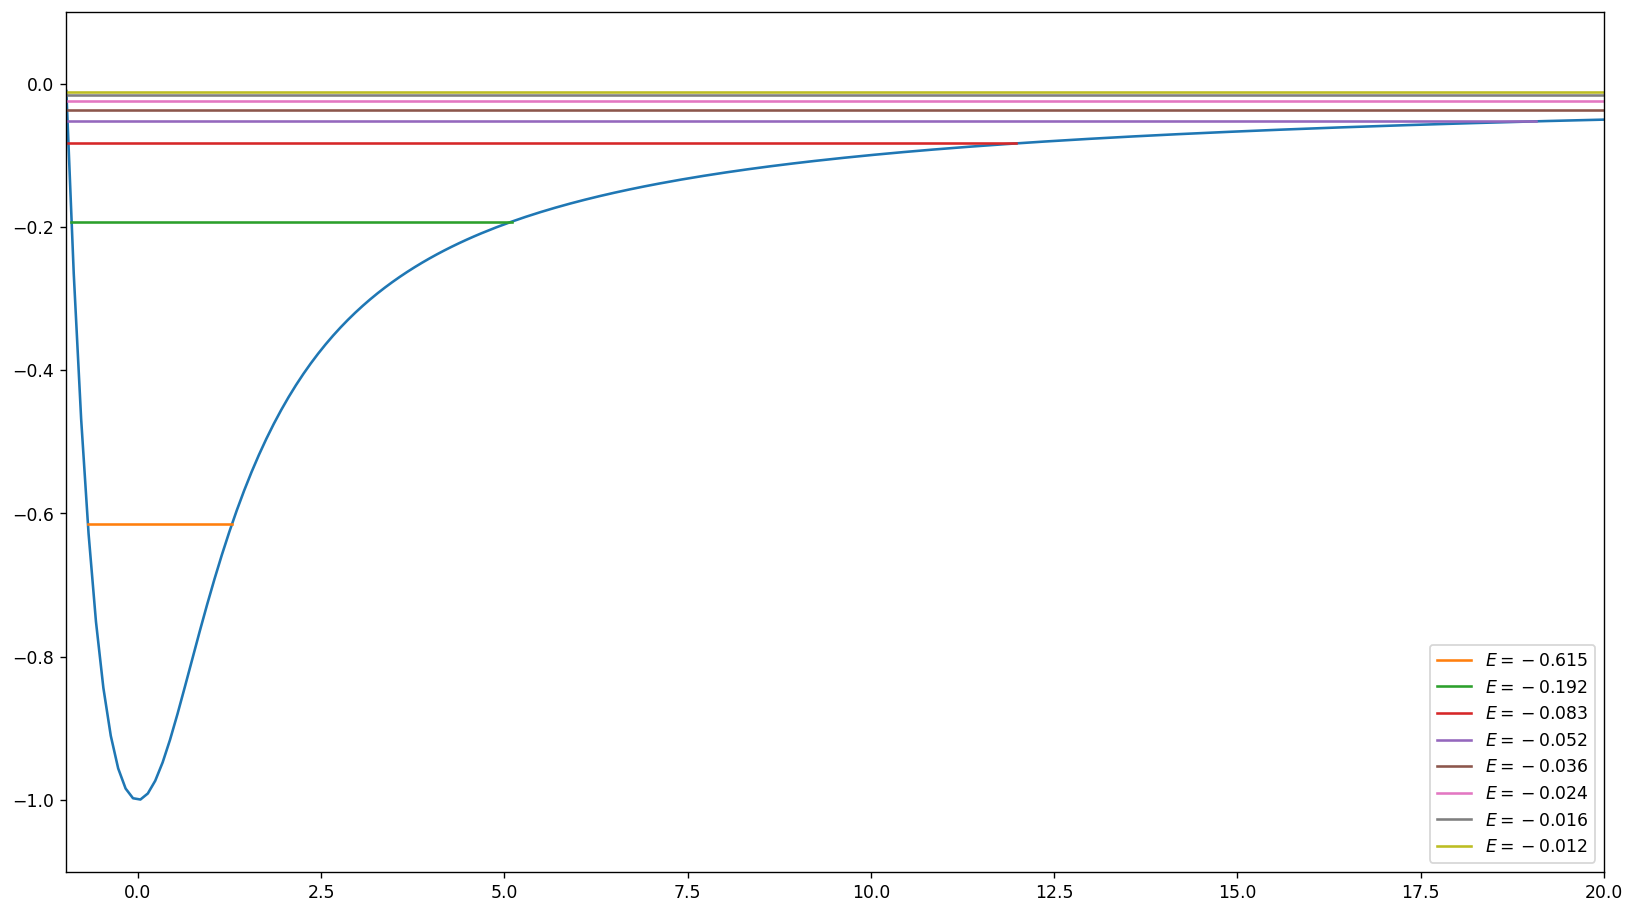

In [16]:
rm, rM = MsC_return_points(alpha, E_max)
plt.figure(figsize=(16, 9),dpi=124)
plt.plot( np.linspace(rm, rM, 1000), [ V_MsC(alpha, x) for x in np.linspace(rm, rM, 1000) ] )
plt.ylim(-1/alpha -0.1, 0.1)
plt.xlim(rm, 20)
for E in MsC_energies:
  plt.plot( MsC_return_points(alpha, E), np.array([E, E]), label="$E = {:.3f}$".format(E) )
plt.legend()
plt.show()

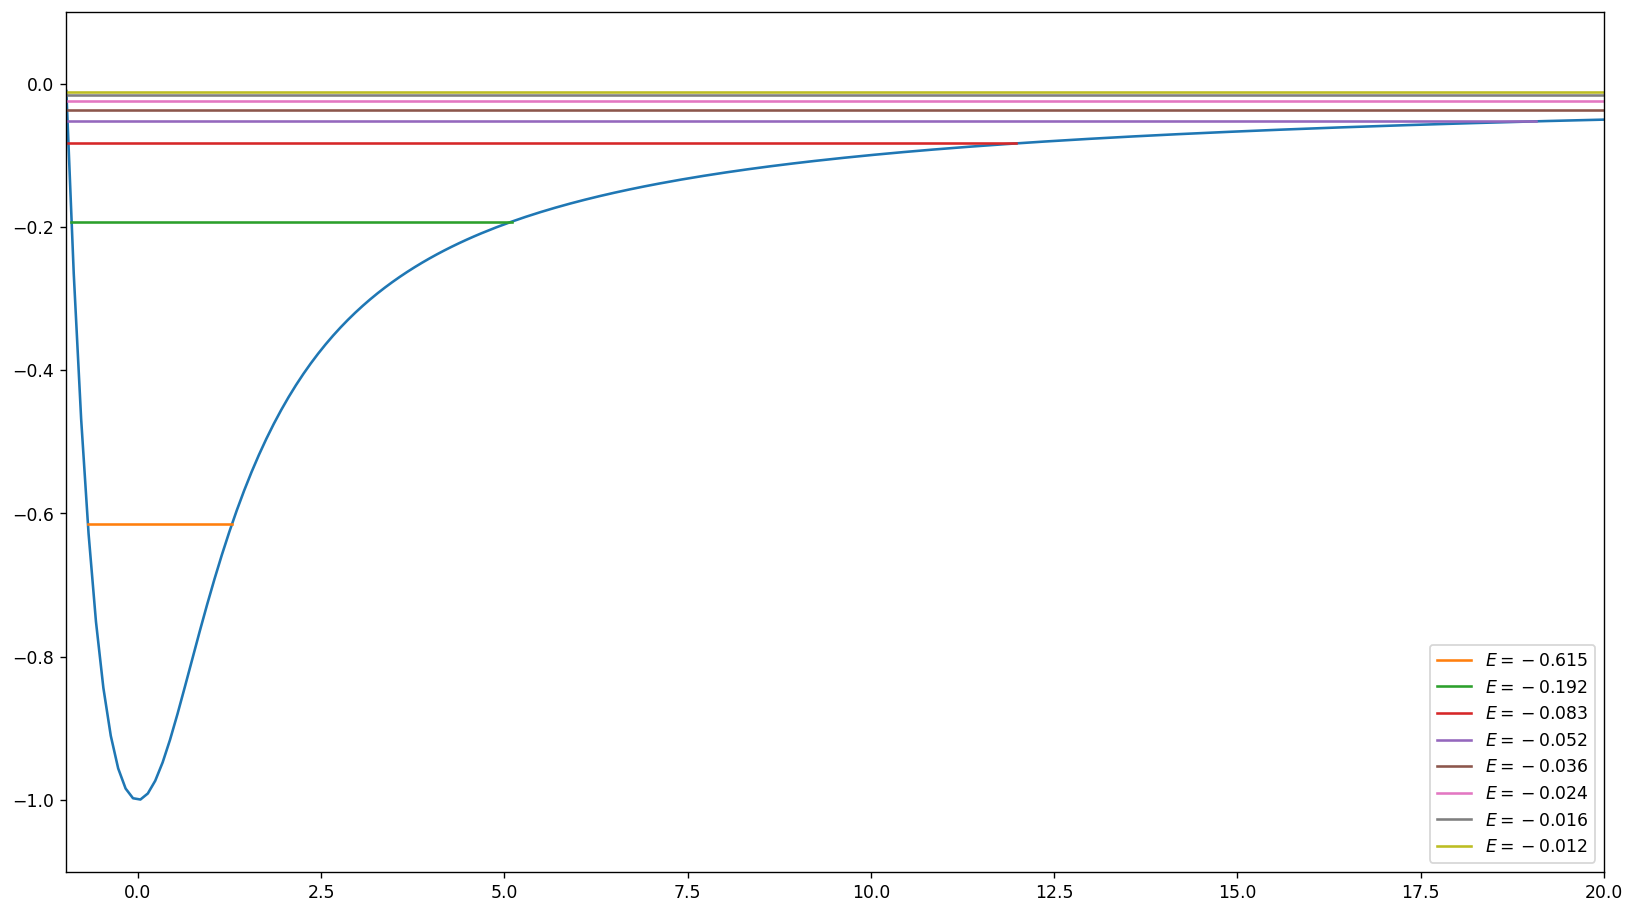

In [17]:
rm, rM = MsC_return_points(alpha, E_max)
plt.figure(figsize=(16, 9),dpi=124)
plt.plot( np.linspace(rm, rM, 1000), [ V_MsC(alpha, x) for x in np.linspace(rm, rM, 1000) ] )
plt.ylim(-1/alpha -0.1, 0.1)
plt.xlim(rm, 20)
for E in MsC_energies:
  plt.plot( MsC_return_points(alpha, E), np.array([E, E]), label="$E = {:.3f}$".format(E) )
plt.legend()
plt.show()

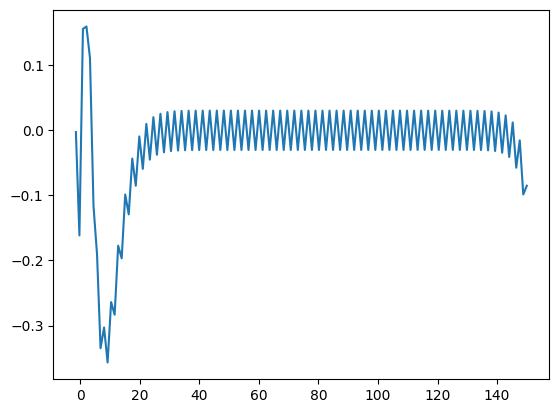

In [18]:
endpoints = 1.5*MsC_return_points(alpha, E_max)
r_grid = np.linspace(endpoints[0], endpoints[1], N)

i = 2
plt.plot(r_grid, MsC_states[:, i])
rm, rM = MsC_return_points(alpha, MsC_energies[i])
#plt.xlim(endpoints[0], rM+10)
plt.show()

[  33   65   97  129  161  193  225  257  289  321  353  385  417  449
  481  513  545  577  609  641  673  705  737  769  801  833  865  897
  929  961  993 1025]
33
65
97
129
161
193
225
257
289
321
353
385
417
449
481
513
545
577
609
641
673
705
737
769
801
833
865
897
929
961
993
1025


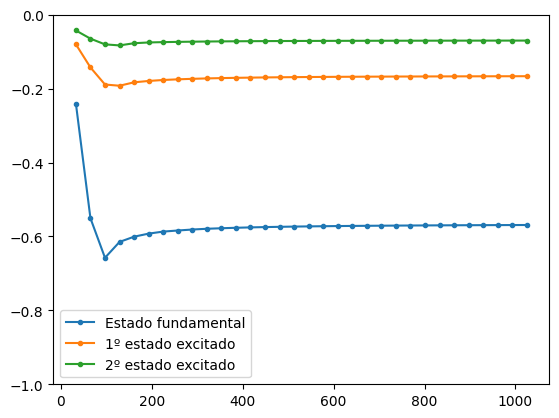

In [19]:
alpha = 1
E_max = -0.01

Ns = np.arange(33, 1025+32, 32, dtype=int)
print(Ns)

E_fundamental = np.zeros(len(Ns))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, N in enumerate(Ns):
  print(N)
  MsC_energies, MsC_states = MsC_eigenstates(alpha, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.plot(Ns, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(Ns, E_first, marker=".", label="1º estado excitado")
plt.plot(Ns, E_second, marker=".", label="2º estado excitado")
plt.ylim(-1, 0)

plt.legend()
plt.show()

  

[  33   65   97  129  161  193  225  257  289  321  353  385  417  449
  481  513  545  577  609  641  673  705  737  769  801  833  865  897
  929  961  993 1025]
33
65
97
129
161
193
225
257
289
321
353
385
417
449
481
513
545
577
609
641
673
705
737
769
801
833
865
897
929
961
993
1025


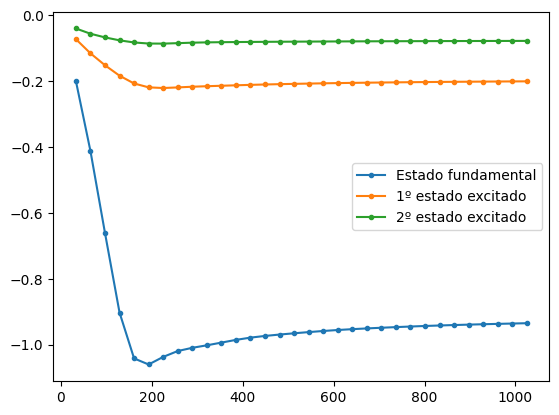

In [20]:
alpha = 0.5
E_max = -0.01

Ns = np.arange(33, 1025+32, 32, dtype=int)
print(Ns)

E_fundamental = np.zeros(len(Ns))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, N in enumerate(Ns):
  print(N)
  MsC_energies, MsC_states = MsC_eigenstates(alpha, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.plot(Ns, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(Ns, E_first, marker=".", label="1º estado excitado")
plt.plot(Ns, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()

  

In [21]:
alpha = 0.5
E_max = -0.001

Ns = np.arange(33, 4096+128, 128, dtype=int)
print(Ns)

E_fundamental = np.zeros(len(Ns))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, N in enumerate(Ns):
  print(N)
  MsC_energies, MsC_states = MsC_eigenstates(alpha, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.plot(Ns, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(Ns, E_first, marker=".", label="1º estado excitado")
plt.plot(Ns, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()

  

[  33  161  289  417  545  673  801  929 1057 1185 1313 1441 1569 1697
 1825 1953 2081 2209 2337 2465 2593 2721 2849 2977 3105 3233 3361 3489
 3617 3745 3873 4001 4129]
33
161
289
417
545
673
801
929
1057
1185
1313
1441
1569
1697
1825
1953
2081
2209


In [23]:
alpha = 0.5
E_max = -0.001

Ns = np.arange(4096+128, 4096+10*128, 128, dtype=int)
print(Ns)

E_fundamental = np.zeros(len(Ns))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, N in enumerate(Ns):
  print(N)
  MsC_energies, MsC_states = MsC_eigenstates(alpha, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.plot(Ns, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(Ns, E_first, marker=".", label="1º estado excitado")
plt.plot(Ns, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()

  

[4224 4352 4480 4608 4736 4864 4992 5120 5248]
4224
4352


[  33   65   97  129  161  193  225  257  289  321  353  385  417  449
  481  513  545  577  609  641  673  705  737  769  801  833  865  897
  929  961  993 1025]
33
65
97
129
161
193
225
257
289
321
353
385
417
449
481
513
545
577
609
641
673
705
737
769
801
833
865
897
929
961
993
1025


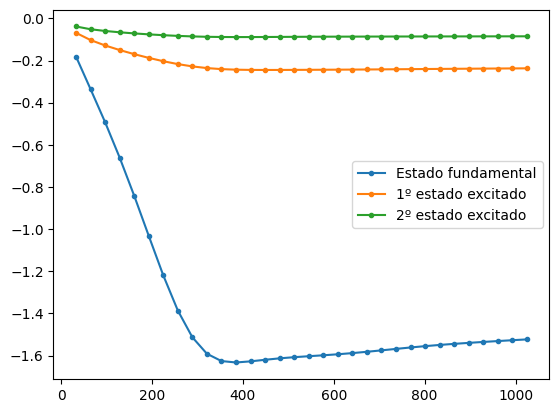

In [20]:
alpha = 0.25
E_max = -0.01

Ns = np.arange(33, 1025+32, 32, dtype=int)
print(Ns)

E_fundamental = np.zeros(len(Ns))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, N in enumerate(Ns):
  print(N)
  MsC_energies, MsC_states = MsC_eigenstates(alpha, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.plot(Ns, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(Ns, E_first, marker=".", label="1º estado excitado")
plt.plot(Ns, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()

  

In [22]:
print(E_fundamental)

[-0.0210069  -0.10013545 -0.17710651 -0.25657679 -0.34118195 -0.43226679
 -0.52986352 -0.63228748 -0.73567079 -0.83391053 -0.91959633 -0.98608977
 -1.02996518 -1.05231555 -1.0580249  -1.05360519 -1.04501348 -1.03597696
 -1.02791759 -1.02133862 -1.01620429 -1.01218862 -1.00886934 -1.00585824
 -1.00287206 -0.99975537 -0.99646947 -0.99306196 -0.98962995 -0.98628629
 -0.98313441 -0.98025342 -0.97769195]


0 0.0001
1 0.06906206896551724
2 0.13802413793103446
3 0.2069862068965517
4 0.27594827586206894
5 0.3449103448275862
6 0.4138724137931034
7 0.4828344827586206
8 0.5517965517241379
9 0.6207586206896551
10 0.6897206896551724
11 0.7586827586206896
12 0.8276448275862068
13 0.8966068965517241
14 0.9655689655172413
15 1.0345310344827585
16 1.1034931034482758
17 1.172455172413793
18 1.2414172413793103
19 1.3103793103448276
20 1.3793413793103448
21 1.4483034482758619
22 1.5172655172413791
23 1.5862275862068964
24 1.6551896551724137
25 1.724151724137931
26 1.7931137931034482
27 1.8620758620689655
28 1.9310379310344825
29 2.0


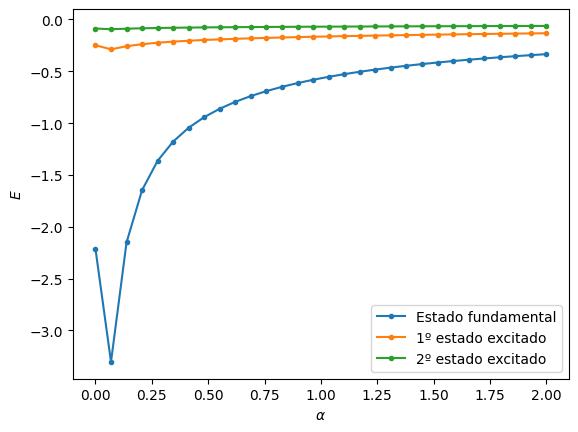

In [22]:
alphas = np.linspace(0.0001, 2, 30)
E_max = -0.01

N = 2049
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in enumerate(alphas):
  print(i, a)
  MsC_energies, MsC_states = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


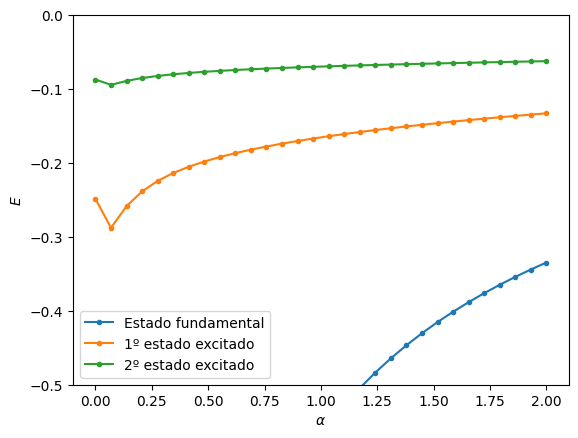

In [23]:
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
plt.ylim(-0.5, 0)

plt.legend()
plt.show()


0 1e-10
1 1.4948366208032859e-10
2 2.2345365228945862e-10
3 3.3402670249452673e-10
4 4.993153472149849e-10
5 7.463948663460673e-10
6 1.1157383797936752e-09
7 1.6678465893513106e-09
8 2.4931581596441984e-09
9 3.726864118490688e-09
10 5.571052965077636e-09
11 8.327813988632779e-09
12 1.2448721321446155e-08
13 1.8608804513472384e-08
14 2.7817122456108048e-08
15 4.1582053332759754e-08
16 6.215837609000472e-08
17 9.291661686900241e-08
18 1.3889516157693312e-07
19 2.076255739775891e-07
20 3.1036631139700255e-07
21 4.639469281398756e-07
22 6.935248582926779e-07
23 1.0367063556133042e-06
24 1.5497066253902812e-06
25 2.316558215134876e-06
26 3.462876054206309e-06
27 5.176433939130375e-06
28 7.737923017381106e-06
29 1.1566930695337938e-05
30 1.7290671593684764e-05
31 2.584672909652315e-05
32 3.863663718146462e-05
33 5.775546016354317e-05
34 8.633497690380983e-05
35 0.0001290566851320208
36 0.00019291865909482363
37 0.0002883818764512078
38 0.00043108378969523414
39 0.000644399835471098
40 0.0009

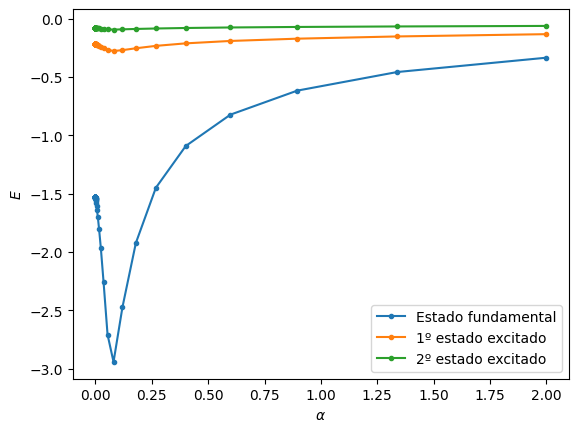

In [26]:
alphas = np.logspace(-10, np.log10(2), 60)
E_max = -0.01

N = 1025
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in enumerate(alphas):
  print(i, a)
  MsC_energies, MsC_states = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


0 1e-05
1 1.3197083192873015e-05
2 1.741630047996118e-05
3 2.298443663461219e-05
4 3.0332752240829537e-05
5 4.003038547910336e-05
6 5.28284327410503e-05
7 6.971812218327374e-05
8 9.200758585035511e-05
9 0.00012142317648425426
10 0.00016024317616056074
11 0.00021147425268811283
12 0.0002790843305875675
13 0.00036830991285914113
14 0.0004860616560761896
15 0.0006414596112103112
16 0.0008465395854010466
17 0.0011171853334597844
18 0.001474358778752637
19 0.0019457235459341231
20 0.0025677875506024505
21 0.0033887305926924203
22 0.00447213595499958
23 0.005901915024796813
24 0.007788806357951075
25 0.010278952547905871
26 0.013565219191030797
27 0.017902132619359103
28 0.023625593350752802
29 0.03117889209308726
30 0.04114704328140837
31 0.05430209533254929
32 0.07166292696509752
33 0.09457416090031759
34 0.12481030692976496
35 0.1647132003880127
36 0.21737338084849675
37 0.28686945909736816
38 0.3785840117202458
39 0.49962046981636965
40 0.6593532905028932
41 0.8701540228261269
42 1.14834

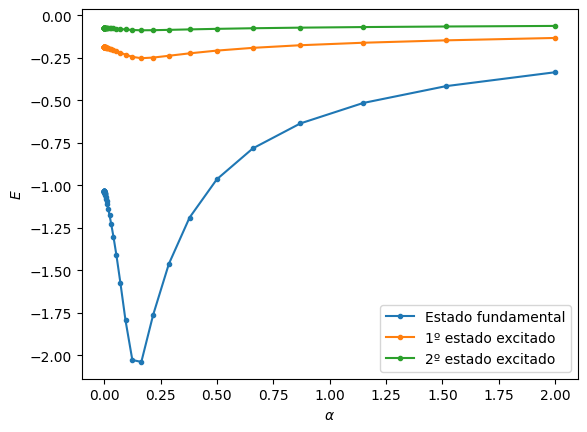

In [27]:
alphas = np.logspace(-5, np.log10(2), 45)
E_max = -0.005

N = 1025
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in enumerate(alphas):
  print(i, a)
  MsC_energies, MsC_states = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


0 1e-05
1 1.662938736241136e-05
2 2.765365240491261e-05
3 4.598632978267703e-05
4 7.647244913317306e-05
5 0.0001271689979187831
6 0.00021147425268811283
7 0.0003516687265127087
8 0.0005848035476425728
9 0.000972492472466073
10 0.0016171954031667477
11 0.0026892968799970833
12 0.00447213595499958
13 0.0074368881133055394
14 0.012367089320707028
15 0.020565711885957794
16 0.03419951893353393
17 0.05687170479538566
18 0.09457416090031759
19 0.15727103560863967
20 0.261532097202366
21 0.4349118552081964
22 0.7232317708762046
23 1.2026901270703145
24 2.0


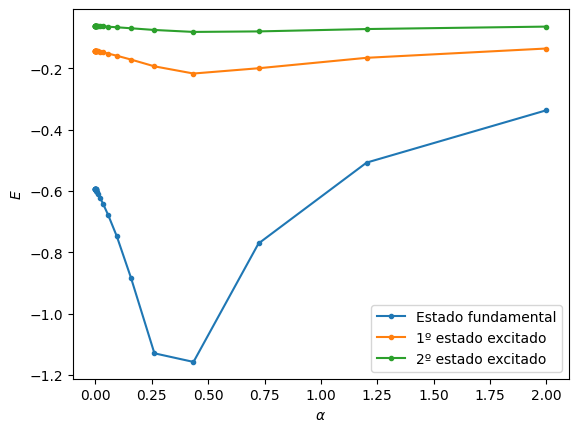

In [28]:
alphas = np.logspace(-5, np.log10(2), 25)
E_max = -0.001

N = 2049
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in enumerate(alphas):
  print(i, a)
  MsC_energies, MsC_states = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


0 1e-05
1 1.662938736241136e-05
2 2.765365240491261e-05
3 4.598632978267703e-05
4 7.647244913317306e-05
5 0.0001271689979187831
6 0.00021147425268811283
7 0.0003516687265127087
8 0.0005848035476425728
9 0.000972492472466073
10 0.0016171954031667477
11 0.0026892968799970833
12 0.00447213595499958
13 0.0074368881133055394
14 0.012367089320707028
15 0.020565711885957794
16 0.03419951893353393
17 0.05687170479538566
18 0.09457416090031759
19 0.15727103560863967
20 0.261532097202366
21 0.4349118552081964
22 0.7232317708762046
23 1.2026901270703145
24 2.0


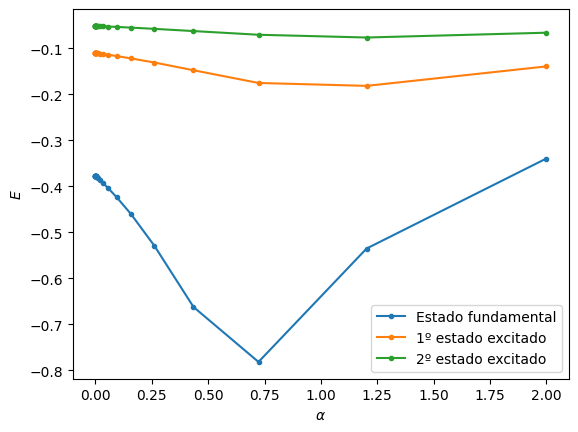

In [29]:
alphas = np.logspace(-5, np.log10(2), 25)
E_max = -0.001

N = 1025
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in enumerate(alphas):
  print(i, a)
  MsC_energies, MsC_states = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


0 1e-05
1 3.881533447356427e-05
2 0.0001506630190294667
3 0.0005848035476425735
4 0.0022699345303073466
5 0.008810826802697267
6 0.034199518933533964
7 0.1327465766240115
8 0.5152602771881635
9 2.0


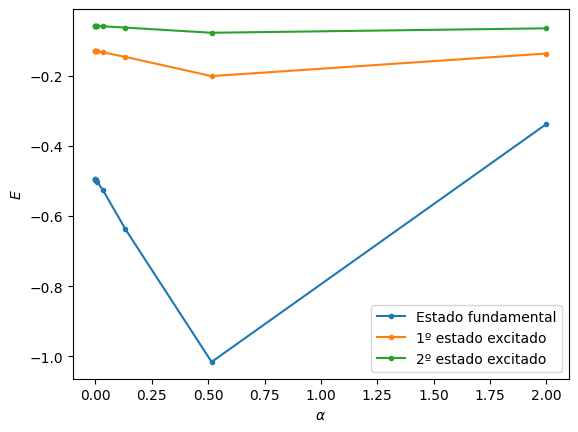

In [31]:
alphas = np.logspace(-5, np.log10(2), 10)
E_max = -0.0005

N = 3097
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in enumerate(alphas):
  print(i, a)
  MsC_energies, MsC_states = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


In [13]:
def lower_return_point(alpha, E):
    return -alpha*np.sqrt(2)*np.log( np.sqrt( alpha*E + 1 ) + 1 )

lower_return_point(2, 1.e8)

np.float64(-27.03123467971073)

In [152]:
from tqdm import tqdm

30it [48:42, 97.43s/it]


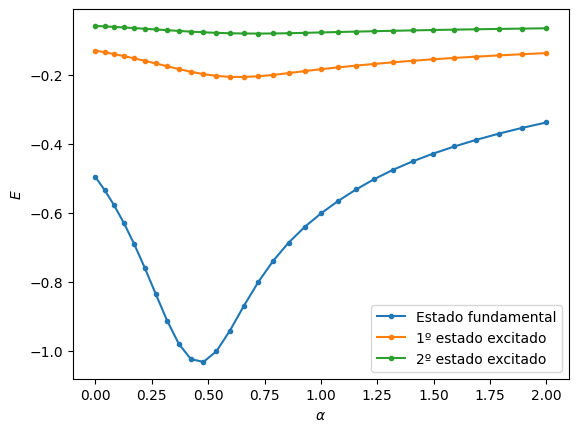

In [154]:
num_points = 30  # Adjust this for the number of points
start = 1.e-5  # Starting value
end = 2.0  # Ending value

# Generate a linear space, but in a transformed domain
linspace_values = np.linspace(0, 1, num_points)

# Apply an exponential transformation to spread points more evenly
alphas = start + (end - start) * (np.exp(linspace_values) - 1) / (np.e - 1)
E_max = -0.0005

N = 3097
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in tqdm(enumerate(alphas)):
  #print(i, a)
  MsC_energies, MsC_states, rs_grid = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


In [156]:
import json

In [157]:
data = {
    "alphas" : list(alphas),
    "E_fundamental" : list(E_fundamental),
    "E_first" : list(E_first),
    "E_second" : list(E_second)
}

json.dump(data, open("EigenEnergies.json", "w"))

In [144]:
num_points = 50  # Adjust this for the number of points
start = 1.e-5  # Starting value
end = 2.0  # Ending value

# Generate a linear space, but in a transformed domain
linspace_values = np.linspace(0, 1, num_points)

# Apply an exponential transformation to spread points more evenly
alphas = start + (end - start) * (np.exp(linspace_values) - 1) / (np.e - 1)
print(alphas)

[1.00000000e-05 2.40080780e-02 4.85009443e-02 7.34988005e-02
 9.90120583e-02 1.25051344e-01 1.51627504e-01 1.78751606e-01
 2.06434949e-01 2.34689062e-01 2.63525714e-01 2.92956915e-01
 3.22994924e-01 3.53652251e-01 3.84941667e-01 4.16876202e-01
 4.49469158e-01 4.82734110e-01 5.16684913e-01 5.51335709e-01
 5.86700928e-01 6.22795302e-01 6.59633864e-01 6.97231957e-01
 7.35605241e-01 7.74769700e-01 8.14741644e-01 8.55537724e-01
 8.97174930e-01 9.39670606e-01 9.83042450e-01 1.02730853e+00
 1.07248728e+00 1.11859751e+00 1.16565844e+00 1.21368966e+00
 1.26271119e+00 1.31274343e+00 1.36380723e+00 1.41592385e+00
 1.46911500e+00 1.52340284e+00 1.57880998e+00 1.63535950e+00
 1.69307494e+00 1.75198035e+00 1.81210026e+00 1.87345971e+00
 1.93608426e+00 2.00000000e+00]


In [34]:
print(MsC_return_points(1.e-5, -0.0001))
print(MsC_return_points(2, -0.0001))
10000*1.5/8193

[-9.80258143e-06  1.00000000e+04]
[-1.96037485e+00  9.99999980e+03]


1.8308311973636031

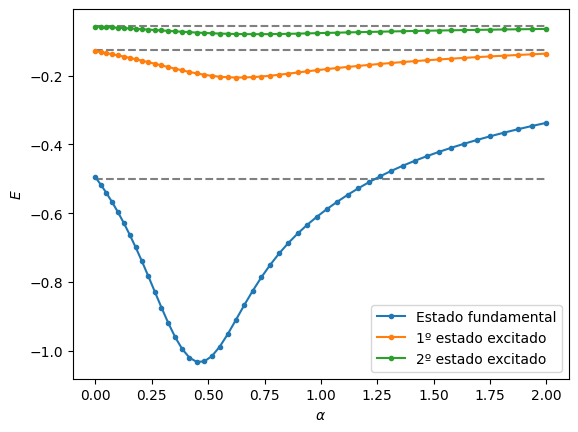

In [27]:
def Balmer(n):
  return-1/(2*n**2)

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot( [0, 2], [Balmer(1), Balmer(1)], ls="dashed", c="grey" )
plt.plot( [0, 2], [Balmer(2), Balmer(2)], ls="dashed", c="grey" )
plt.plot( [0, 2], [Balmer(3), Balmer(3)], ls="dashed", c="grey" )
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()

working_alphas = alphas
working_energies = {
  "Fundamental": E_fundamental,
  "First_excited": E_first,
  "Second_excited": E_second
}

In [8]:
def Balmer(n):
  return-1/(2*n**2)

In [9]:
@njit
def V_MsC(alpha: float, r: float) -> float:

    """Calculates the 1D Morse-Coulomb potencial given the position r"""
    

    D = 1/alpha ; beta = 1/(alpha*np.sqrt(2))

    if r > 0:
        pot = -1/np.sqrt(r*r + alpha*alpha)
    else:
        pot = D*( np.exp( -2*beta*r) -2*np.exp( -beta*r ) )
    return pot

@njit
def MsC_return_points(alpha: float, E: float):

    """Calculates the return points of a particle based on alpha and the total Energy"""
    
    rm = -alpha*np.sqrt(2)*np.log( np.sqrt( alpha*E + 1 ) + 1 )
    rM = np.sqrt( 1/(E**2) - alpha**2 )
    
    return np.array([rm, rM])

@njit(parallel=True)
def MsC_eigenfunctions(alpha, rm, rM, delta_r):


    L = rM - rm
    N = int(np.ceil(L/delta_r))
    N += int( N % 2 == 0 )
    print(N)
    #print(delta_r)

    E_max = -1/rM

    r_grid = np.linspace(rm, rM, N)

    delta_k = 2*np.pi/L
    n = int((N-1)/2)

    def T_l(l, L):
        return 2*(np.pi*l/L)**2

    H = np.empty( (N, N) )

    for i in prange(N):
        for j in prange(N):
            l_sum = 0
            for l in prange(0, n):
                l_sum += np.cos( l*(2*np.pi)*(i - j)/(N-1) )*T_l(l, L)
            #print(l_sum)
            H[i, j] = (2/(N-1))*l_sum + V_MsC(alpha, r_grid[i])*(i == j)
            #print( str( round(H[i, j], 3) ) + " ", end='')
        #print("\n")

    # Find the eigenvalues and eigenvectors
    eig_energies, eig_states = np.linalg.eig(H)

    # Sort eigenvalues and corresponding eigenvectors
    sort_indexes = np.argsort(eig_energies)
    eig_energies = eig_energies[sort_indexes]
    eig_states = eig_states[:, sort_indexes]/np.sqrt(delta_r)

    # Filter eigenvalues less than or equal to E_max and corresponding eigenvectors
    mask = eig_energies <= E_max
    eig_energies = eig_energies[mask]
    eig_states = eig_states[:, mask]
    print(eig_energies)

    return eig_energies, eig_states, r_grid

In [10]:
MsC_return_points(0.1, Balmer(3))

array([-0.09782899, 17.99972222])

In [100]:
V_MsC(0.01, -0.1)

138392680.60750818

In [14]:
def Grid_size(rm, rM, delta_r):
  L = rM - rm
  N = int(np.ceil(L/delta_r))
  N += int( N % 2 == 0 )
  print(N)

Grid_size(lower_return_point(0.5, 1.e5), 100, 0.1)

1039


1039
[-0.84782671 -0.1778742  -0.07060295 -0.03740043 -0.02308189 -0.01564233
 -0.01105555]


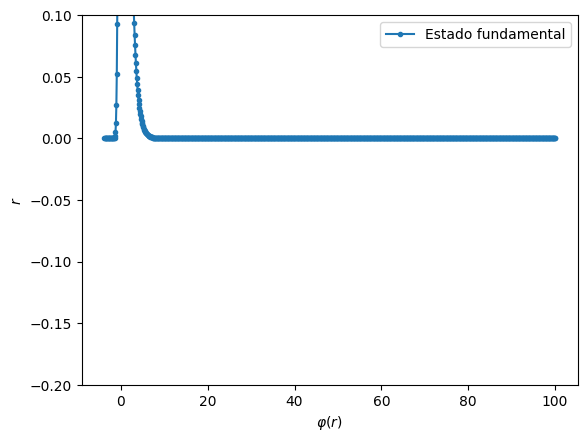

In [15]:
E_max = -0.1

N = 1025
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)
alpha = 0.5
MsC_energies, MsC_states, r_grid = MsC_eigenfunctions(alpha, lower_return_point(alpha, 1.e5), 100, 0.1)


plt.xlabel(r"$\varphi(r)$")
plt.ylabel(r"$r$")
plt.plot(r_grid, MsC_states[:, 0], marker=".", label="Estado fundamental")
#plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
#plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
plt.ylim(-0.2, 0.1)

plt.legend()
plt.show()


In [18]:
from scipy.special import genlaguerre

In [19]:
rM = MsC_return_points(0, E_max)[1]
#print(endpoints)
endpoints = [-0.1*rM, 1.5*rM]
print(endpoints)

[np.float64(-1.0), np.float64(15.0)]


4
5


In [20]:

def Lag(n, x):
    """
    Associated Laguerre polynomial L^1_{n-1}(x)
    """
    # L_n-1^1 is a generalized Laguerre polynomial with alpha=1
    return genlaguerre(n-1, 1)(x)


def Coulomb_eigenfunction(r, n):
    """
    Computes the Coulomb wavefunction φ_n(r)
    """
    # Pre-factor
    if r <= 0:
        return 0
    prefactor = (2 * r) / np.sqrt(n**5)
    
    # Exponential term
    exp_term = np.exp(-r/n)
    
    # Laguerre polynomial term
    laguerre_term = Lag(n, 2 * r / n)
    
    # Complete wavefunction
    return prefactor * exp_term * laguerre_term

In [44]:
print(r_grid[0])

-2.93012783149989


In [122]:
print(MsC_states.shape)

(1011, 7)


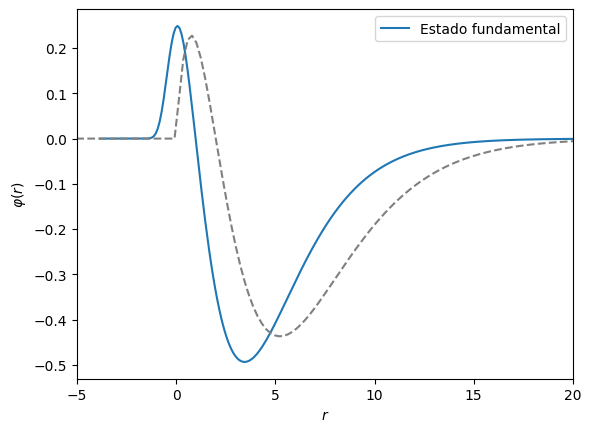

In [213]:

rs = np.linspace(-10, 100, 500)
C_eig = np.array([ Coulomb_eigenfunction(r, 2) for r in rs ])

plt.ylabel(r"$\varphi(r)$")
plt.xlabel(r"$r$")
plt.plot(r_grid, -MsC_states[:, 1], label="Estado fundamental")
#plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
#plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)
plt.plot( rs, C_eig, ls="dashed", c="grey")
plt.xlim(-5, 20)
#plt.ylim(-0.1, 1.2)
plt.legend()
plt.show()


In [1]:
def momentum_eigenfunction(phi_r, r_grid):
    delta_r = r_grid[1] - r_grid[0]
    L = r_grid[-1] - r_grid[0]
    N = len(r_grid)
    delta_p = 2*np.pi/L
    n = int((N-1)/2)

    phi_p = np.zeros(2*n+1, dtype=np.complex128)

    for k in range(-n, n+1, 1):
        for i in range(N):
            phi_p[k+n] += (1/np.sqrt(2*np.pi))*np.exp(-k*1j*delta_p*r_grid[i])*phi_r[i]*delta_r

    p_grid = np.linspace(-n*delta_p, n*delta_p, 2*n+1)
    return p_grid, phi_p

In [2]:
def Coulomb_momentum_eigenfunction(p, n):
    return np.sqrt(2*n/np.pi)*(1/( 1 + (n*p)**2 ))*( (1 - n*p*1j)/(1 + n*p*1j) )**(n)

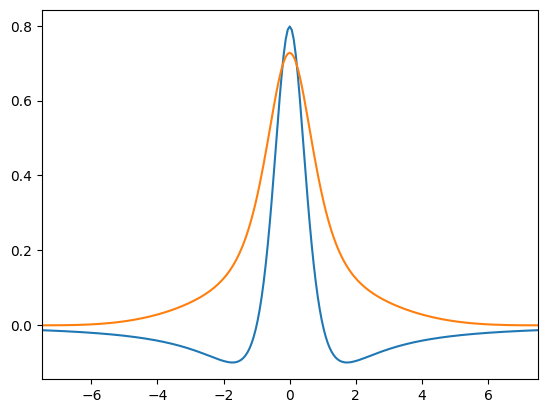

In [19]:
p_grid, phi_p = momentum_eigenfunction(MsC_states[:, 0], r_grid)
Cou_phi_p = np.array([ Coulomb_momentum_eigenfunction(p, 1) for p in p_grid ])
plt.plot(p_grid, Cou_phi_p.real)
plt.plot(p_grid, phi_p.real)
plt.xlim(-7.5, 7.5)
plt.show()

In [169]:
n = 10
deltap = 0.5
print(list(range(-n, n, 1)))
len(list(range(-n, n, 1)))

np.linspace(-n*deltap, (n)*deltap, 2*n+1)


[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

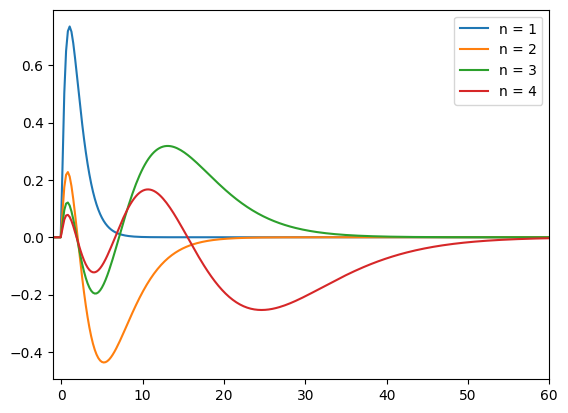

In [35]:
rs = np.linspace(-10, 100, 500)

for n in [1, 2, 3, 4]:
  C_eig = np.array([ Coulomb_eigenfunction(r, n) for r in rs ])
  plt.plot( rs, C_eig, label="n = {}".format(n))
plt.xlim(-1, 60)
plt.legend()
plt.show()


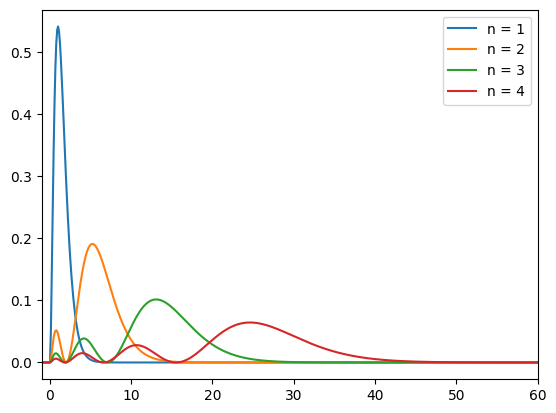

In [37]:
rs = np.linspace(-10, 100, 1000)

for n in [1, 2, 3, 4]:
  C_eig = np.array([ Coulomb_eigenfunction(r, n)**2 for r in rs ])
  plt.plot( rs, C_eig, label="n = {}".format(n))
plt.xlim(-1, 60)
plt.legend()
plt.show()

In [1]:
working_energies["Fundamental"]

NameError: name 'working_energies' is not defined

In [155]:
import json

In [115]:
data={
  "alpha" : alpha,
  "energies": list(MsC_energies),
  "states": [ list(stt) for stt in MsC_states],
  "grid": list(r_grid)
}

json.dump(data, open("Eigenproblem-0.json", "w"))

```
array([-0.49554676, -0.51721044, -0.54100973, -0.56717237, -0.59592739,
       -0.6274874 , -0.66201965, -0.69960073, -0.74014977, -0.78333547,
       -0.82845727, -0.87431198, -0.91907791, -0.96027765, -0.99490513,
       -1.01979464, -1.03223188, -1.03066209, -1.0152156 , -0.98778206,
       -0.95156616, -0.91031999, -0.86757077, -0.82593244, -0.78661917,
       -0.75021123, -0.71690141, -0.68657467, -0.6589072 , -0.63347282,
       -0.60984028, -0.58764585, -0.56663284, -0.54665741, -0.52766791,
       -0.5096694 , -0.49268554, -0.47672806, -0.46176892, -0.44769721,
       -0.43438541, -0.42172305, -0.40962169, -0.39801652, -0.38686439,
       -0.37613948, -0.36582748, -0.35591988, -0.34640933, -0.33728642])
```

```

10it [34:56, 209.67s/it]


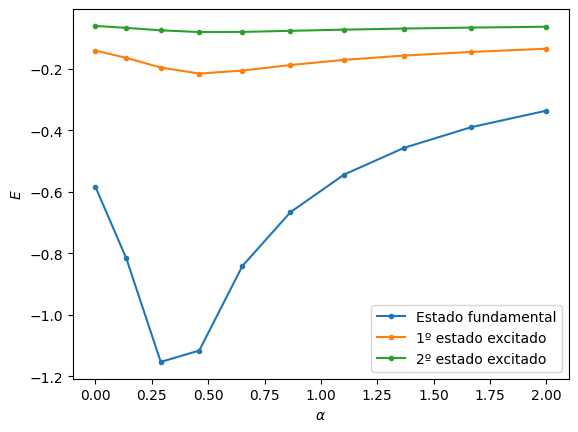

In [23]:
num_points = 10  # Adjust this for the number of points
start = 1.e-5  # Starting value
end = 2.0  # Ending value

# Generate a linear space, but in a transformed domain
linspace_values = np.linspace(0, 1, num_points)

# Apply an exponential transformation to spread points more evenly
alphas = start + (end - start) * (np.exp(linspace_values) - 1) / (np.e - 1)
E_max = -0.0005

N = 4001
#Ns = np.arange(33, 1025+32, 32, dtype=int)
#print(Ns)

E_fundamental = np.zeros(len(alphas))
E_first = np.zeros_like(E_fundamental)
E_second = np.zeros_like(E_fundamental)

for i, a in tqdm(enumerate(alphas)):
  #print(i, a)
  MsC_energies, MsC_states, r_grid = MsC_eigenstates(a, E_max, N)
  E_fundamental[i] = MsC_energies[0]
  E_first[i] = MsC_energies[1]
  E_second[i] = MsC_energies[2]

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$E$")
plt.plot(alphas, E_fundamental, marker=".", label="Estado fundamental")
plt.plot(alphas, E_first, marker=".", label="1º estado excitado")
plt.plot(alphas, E_second, marker=".", label="2º estado excitado")
#plt.ylim(-1, 0)

plt.legend()
plt.show()


In [22]:
import json

In [ ]:
data = {
  "alphas": list(alphas),
  "fundamental": list(E_fundamental),
  "first": list(E_first),
  "second": list(E_second)
}

[1.00000000e-05 4.08461492e-02 8.31150012e-02 1.26866821e-01
 1.72153638e-01 2.19029306e-01 2.67549569e-01 3.17772125e-01
 3.69756698e-01 4.23565108e-01 4.79261341e-01 5.36911632e-01
 5.96584535e-01 6.58351014e-01 7.22284519e-01 7.88461079e-01
 8.56959389e-01 9.27860907e-01 1.00124995e+00 1.07721378e+00
 1.15584274e+00 1.23723034e+00 1.32147335e+00 1.40867196e+00
 1.49892986e+00 1.59235439e+00 1.68905664e+00 1.78915161e+00
 1.89275832e+00 2.00000000e+00]


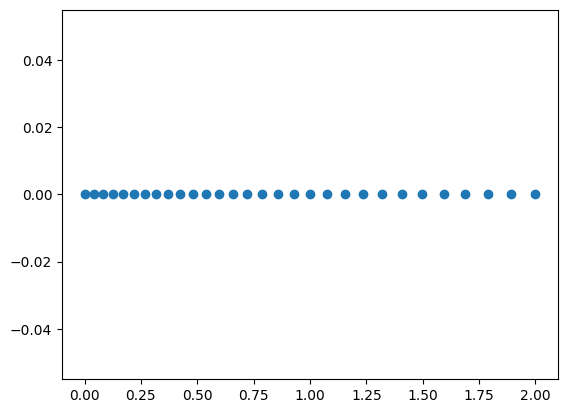

In [21]:
num_points = 30  # Adjust this for the number of points
start = 1.e-5  # Starting value
end = 2.0  # Ending value

# Generate a linear space, but in a transformed domain
linspace_values = np.linspace(0, 1, num_points)

# Apply an exponential transformation to spread points more evenly
alphas = start + (end - start) * (np.exp(linspace_values) - 1) / (np.e - 1)

plt.scatter(alphas, np.zeros_like(alphas))
print(alphas)

In [35]:
Es, sts = MsC_eigenstates(1.e-5, -0.0001, 8192)
print(Es[0])

: 